Saving tips.csv to tips.csv
🔍 Descriptive Statistics:

                 Mean   Std Dev   Min  Median    Max
total_bill  19.785943  8.902412  3.07  17.795  50.81
tip          2.998279  1.383638  1.00   2.900  10.00
size         2.569672  0.951100  1.00   2.000   6.00

🧪 Missing Values:

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

🚨 Outlier Summary:

            15th Percentile  90th Percentile  Outlier Count  Outlier %
total_bill            11.60            32.24           62.0      25.41
tip                    1.74             5.00           55.0      22.54
size                   2.00             4.00           13.0       5.33

📈 Univariate Analysis - Numerical Columns:



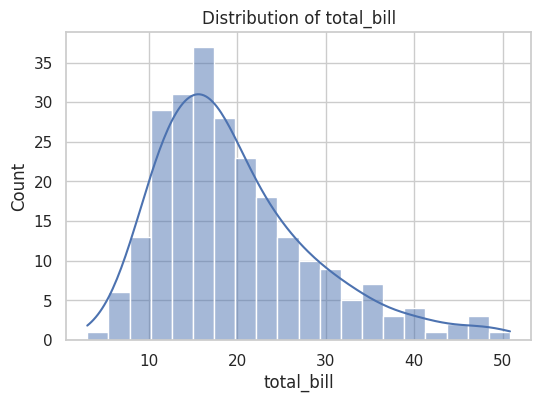

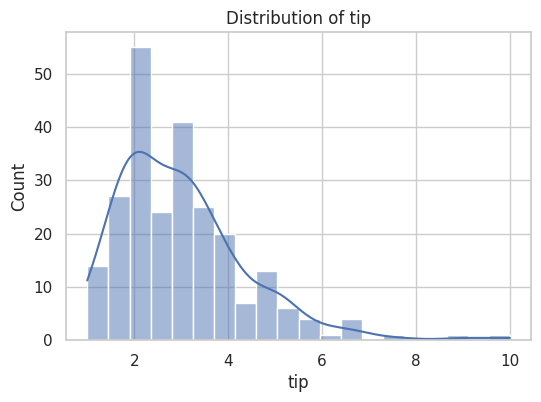

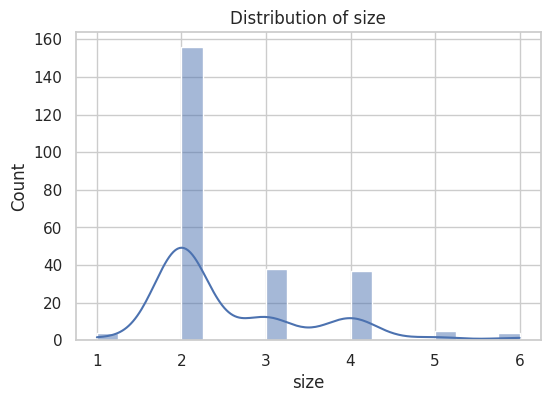


📊 Univariate Analysis - Categorical Columns:



<ipython-input-11-7aa4da319987>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


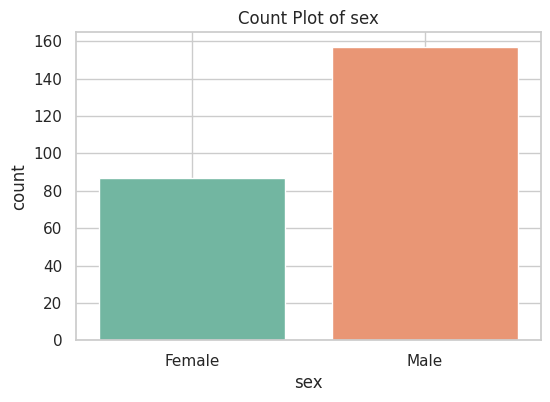

<ipython-input-11-7aa4da319987>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


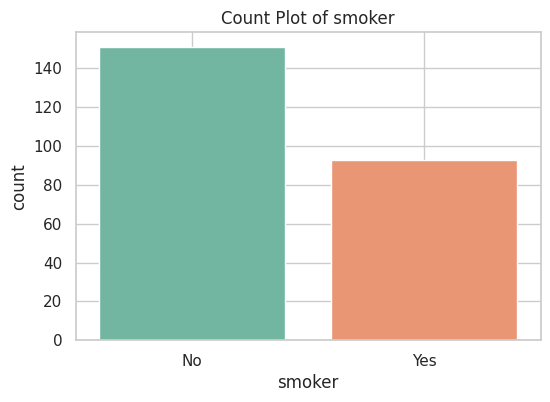

<ipython-input-11-7aa4da319987>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


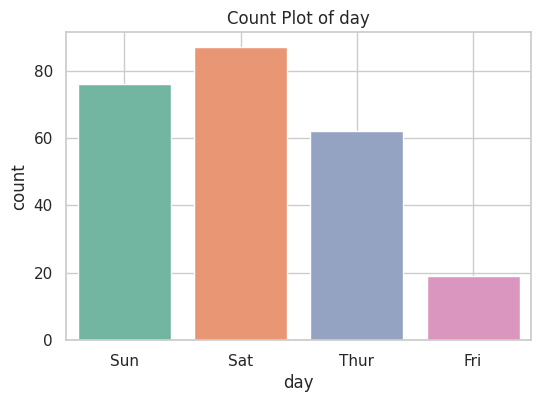

<ipython-input-11-7aa4da319987>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


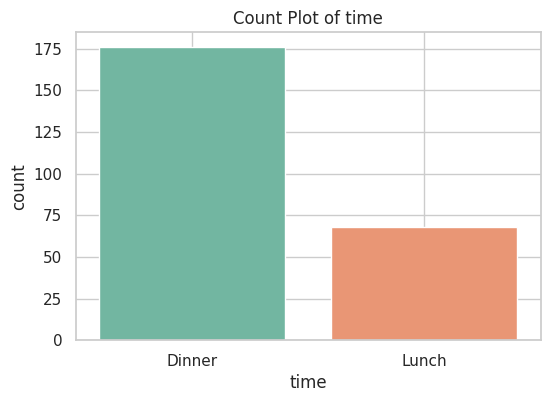

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


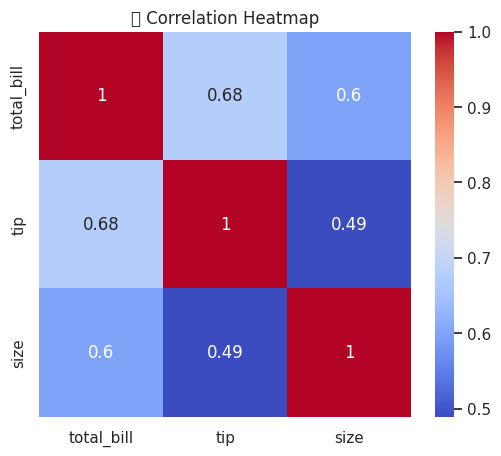

<ipython-input-11-7aa4da319987>:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='tip', palette="Set3")


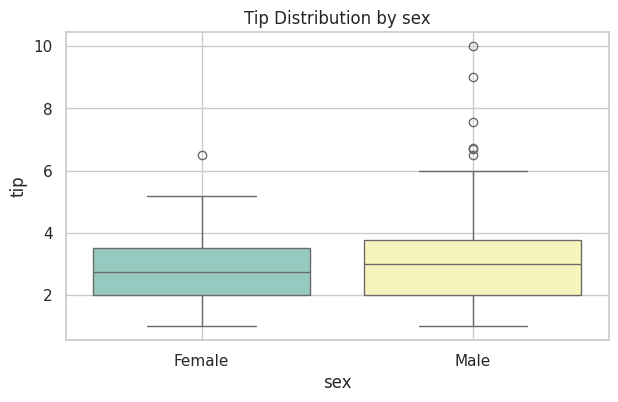

<ipython-input-11-7aa4da319987>:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='tip', palette="Set3")


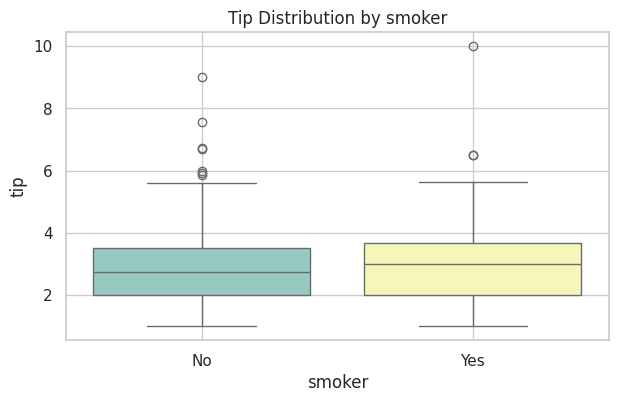

<ipython-input-11-7aa4da319987>:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='tip', palette="Set3")


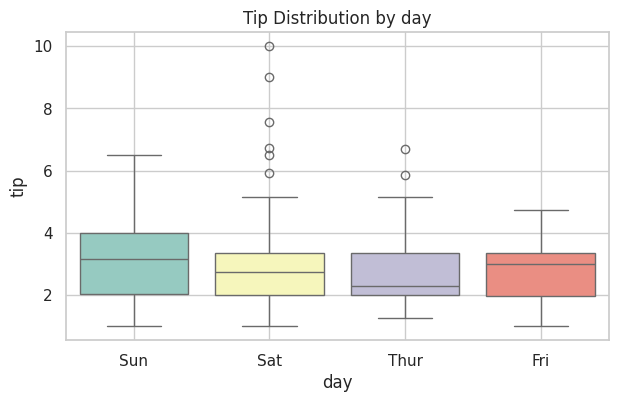

<ipython-input-11-7aa4da319987>:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='tip', palette="Set3")


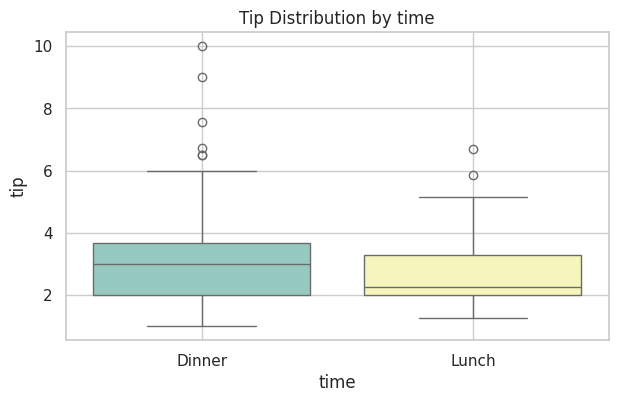

In [11]:
# 📌 Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure inline plotting for Colab
%matplotlib inline

# 📌 Step 2: Load the CSV File
# Upload manually or use path if already uploaded
from google.colab import files
uploaded = files.upload()

# Assuming file name is tips.csv
df = pd.read_csv("tips.csv")

# 📌 Step 3: Descriptive Statistics (Column Format)
desc_stats = df.describe().T
desc_stats = desc_stats.rename(columns={
    "mean": "Mean",
    "std": "Std Dev",
    "min": "Min",
    "25%": "Q1",
    "50%": "Median",
    "75%": "Q3",
    "max": "Max"
})[["Mean", "Std Dev", "Min", "Median", "Max"]]
print("🔍 Descriptive Statistics:\n")
print(desc_stats)

# 📌 Step 4: Check Missing Values
print("\n🧪 Missing Values:\n")
print(df.isnull().sum())

# 📌 Step 5: Outlier Detection (Not between 15th and 90th Percentile)
outlier_summary = {}
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

for col in numeric_cols:
    q15 = df[col].quantile(0.15)
    q90 = df[col].quantile(0.90)
    outliers = df[(df[col] < q15) | (df[col] > q90)]
    outlier_summary[col] = {
        "15th Percentile": round(q15, 2),
        "90th Percentile": round(q90, 2),
        "Outlier Count": len(outliers),
        "Outlier %": round((len(outliers) / len(df)) * 100, 2)
    }

print("\n🚨 Outlier Summary:\n")
print(pd.DataFrame(outlier_summary).T)

# 📌 Step 6: Univariate Analysis
# Numerical
print("\n📈 Univariate Analysis - Numerical Columns:\n")
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.grid(True)
    plt.show()

# Categorical
cat_cols = df.select_dtypes(include="object").columns
print("\n📊 Univariate Analysis - Categorical Columns:\n")
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f'Count Plot of {col}')
    plt.grid(True)
    plt.show()

# 📌 Step 7: Bivariate Analysis
# Correlation Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("🔗 Correlation Heatmap")
plt.show()

# Tips by Categorical Columns
for col in cat_cols:
    plt.figure(figsize=(7, 4))
    sns.boxplot(data=df, x=col, y='tip', palette="Set3")
    plt.title(f'Tip Distribution by {col}')
    plt.grid(True)
    plt.show()
